# KNN

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importo los datasets

In [64]:
train = pd.read_csv("data/train.csv", index_col = "Unnamed: 0")
test = pd.read_csv("data/test.csv", index_col = "Unnamed: 0")

#### Separo features de target

In [65]:
X_train = train.drop('target', axis=1)
y_train = train.target

In [66]:
X_test = test.drop('target', axis=1)
y_test = test.target

### Ajustando el modelo
Buscando el mejor hiperparámetro

In [68]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [69]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [70]:
scores = []

for i in range(1,10):
    modelo =  KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(modelo, X_train, y_train ,cv=kf)
    scores.append({'vecinos':i,
                  'media':np.mean(cvs),
                  'desvio':np.std(cvs)})

In [73]:
scores = pd.DataFrame(scores)
scores

,vecinos,media,desvio
0,1,0.697442,0.012864
1,2,0.739025,0.017917
2,3,0.724461,0.018086
3,4,0.744426,0.018672
4,5,0.747010,0.017732
5,6,0.748653,0.015667
6,7,0.743488,0.015803
7,8,0.751473,0.018999
8,9,0.749593,0.017684


#### Hiperparámetro óptimo

In [74]:
scores[scores.media == scores.media.max()]

,vecinos,media,desvio
7,8,0.751473,0.018999


### Importo y entreno el modelo

In [75]:
knn = KNeighborsClassifier(n_neighbors=8)

In [76]:
knn.fit(X_train, y_train);

### Prediciendo sobre test

In [77]:
y_pred = knn.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.7434813248766737

In [79]:
(y_test == y_pred).sum() / y_test.shape[0]

0.7434813248766737

### Evaluando resultados

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [85]:
confusion = confusion_matrix(y_test, y_pred)

In [86]:
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]
TP, TN, FP, FN

(902, 153, 89, 275)

In [87]:
accuracy_score(y_test, y_pred), (TP + TN) / (TP + TN + FP + FN)

(0.7434813248766737, 0.7434813248766737)

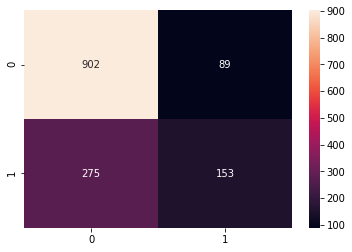

In [88]:
sns.heatmap(confusion,annot=True, fmt='.0f')

In [89]:
# precision

precision_score(y_test, y_pred)

0.6322314049586777

In [90]:
# Sensitivity o recall_score

recall_score(y_test, y_pred)

0.3574766355140187